In [1]:
import pandas as pd

In [2]:
test=pd.read_csv("bigdatamart_test.csv")
train=pd.read_csv("bigdatamart_train.csv")

In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.shape

(5681, 11)

In [6]:
train.shape

(8523, 12)

In [7]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## categorical features
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [10]:
# checking for missing value
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
import numpy as np
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)


In [12]:
train.isnull().sum()    # there is no null value in item weight

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

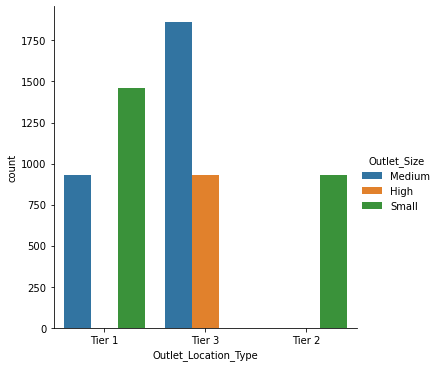

In [13]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.factorplot('Outlet_Location_Type',data = train,hue ='Outlet_Size' ,kind='count')

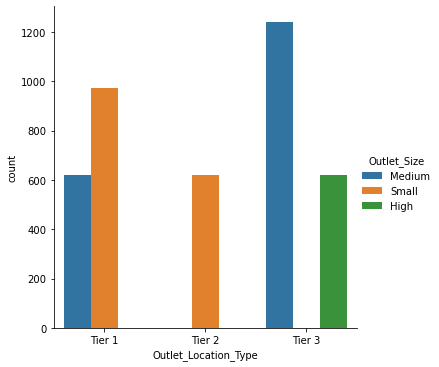

In [14]:
sns.factorplot('Outlet_Location_Type',data = test,hue ='Outlet_Size' ,kind='count')

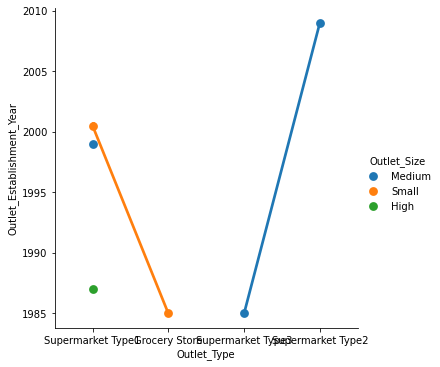

In [15]:
sns.factorplot('Outlet_Type','Outlet_Establishment_Year',data = test,hue='Outlet_Size' )

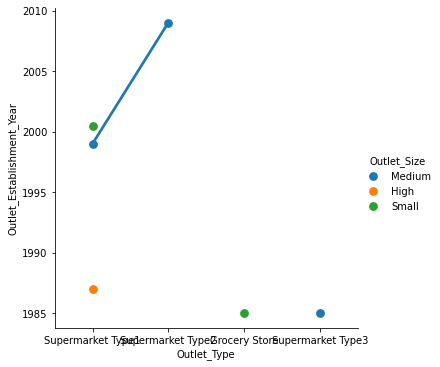

In [16]:
sns.factorplot('Outlet_Type','Outlet_Establishment_Year',data = train,hue='Outlet_Size' )

In [17]:
mode_outlet_size=train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [18]:
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [19]:
missing_values=train['Outlet_Size'].isnull()

In [20]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [21]:
#train.loc[missing_values,'Outlet_Size']=train.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet_size)
train['Outlet_Size'].fillna(('Medium'),inplace=True)

In [22]:
train.isnull().sum()    # there is no null value in Outlet_size

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [24]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


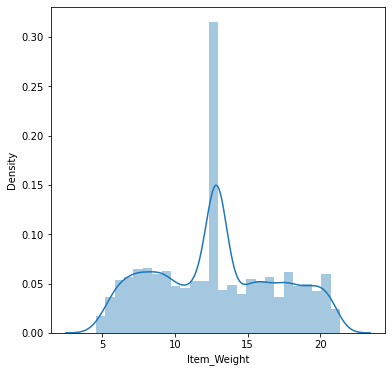

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Weight'])
plt.show()

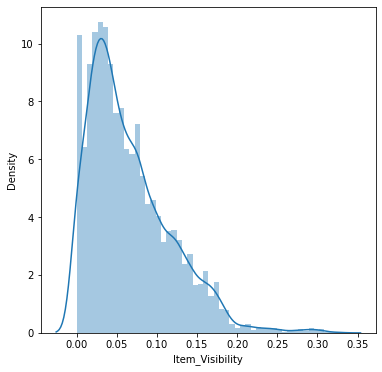

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Visibility'])
plt.show()

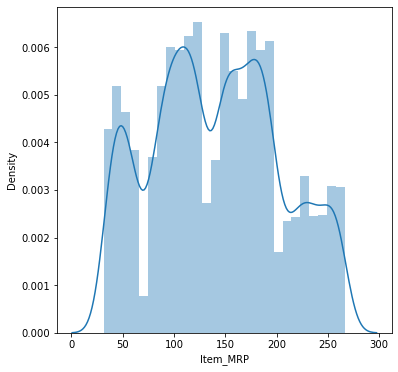

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.distplot(train['Item_MRP'])
plt.show()

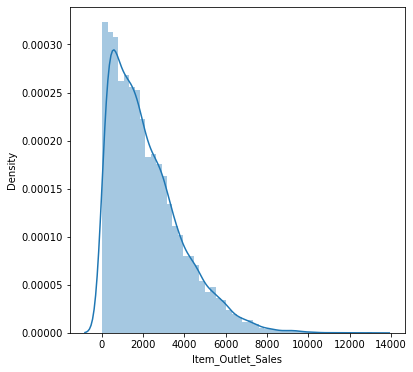

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Outlet_Sales'])
plt.show()

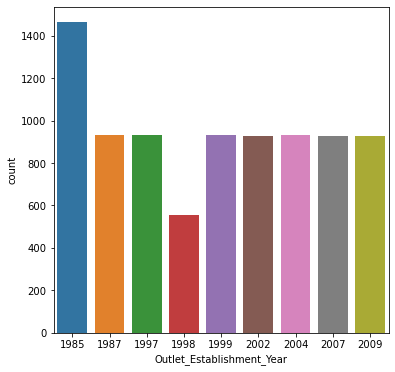

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.countplot(train['Outlet_Establishment_Year'])
plt.show()

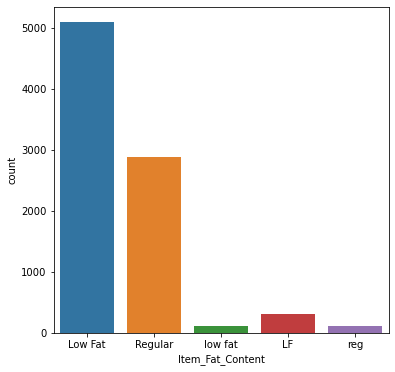

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.countplot(train['Item_Fat_Content'])
plt.show()

In [31]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

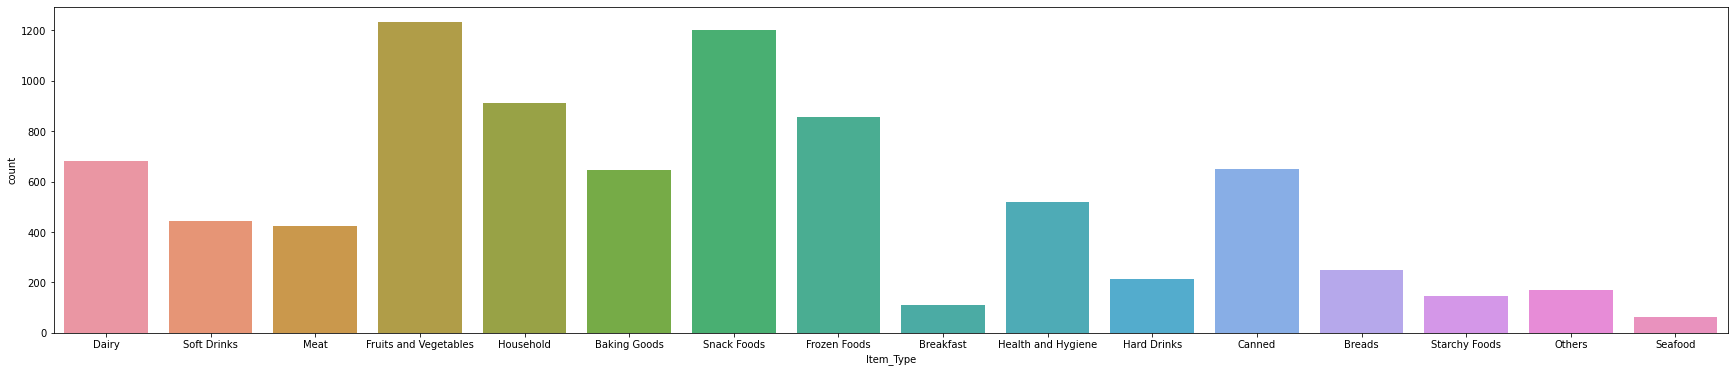

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,6))
sns.countplot(train['Item_Type'])
plt.show()

In [33]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
#test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [34]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [35]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [37]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
train['Item_Identifier']=enc.fit_transform(train['Item_Identifier'])
train['Item_Type']=enc.fit_transform(train['Item_Type'])
train['Item_Fat_Content']=enc.fit_transform(train['Item_Fat_Content'])
train['Outlet_Identifier']=enc.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size']=enc.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']=enc.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']=enc.fit_transform(train['Outlet_Type'])

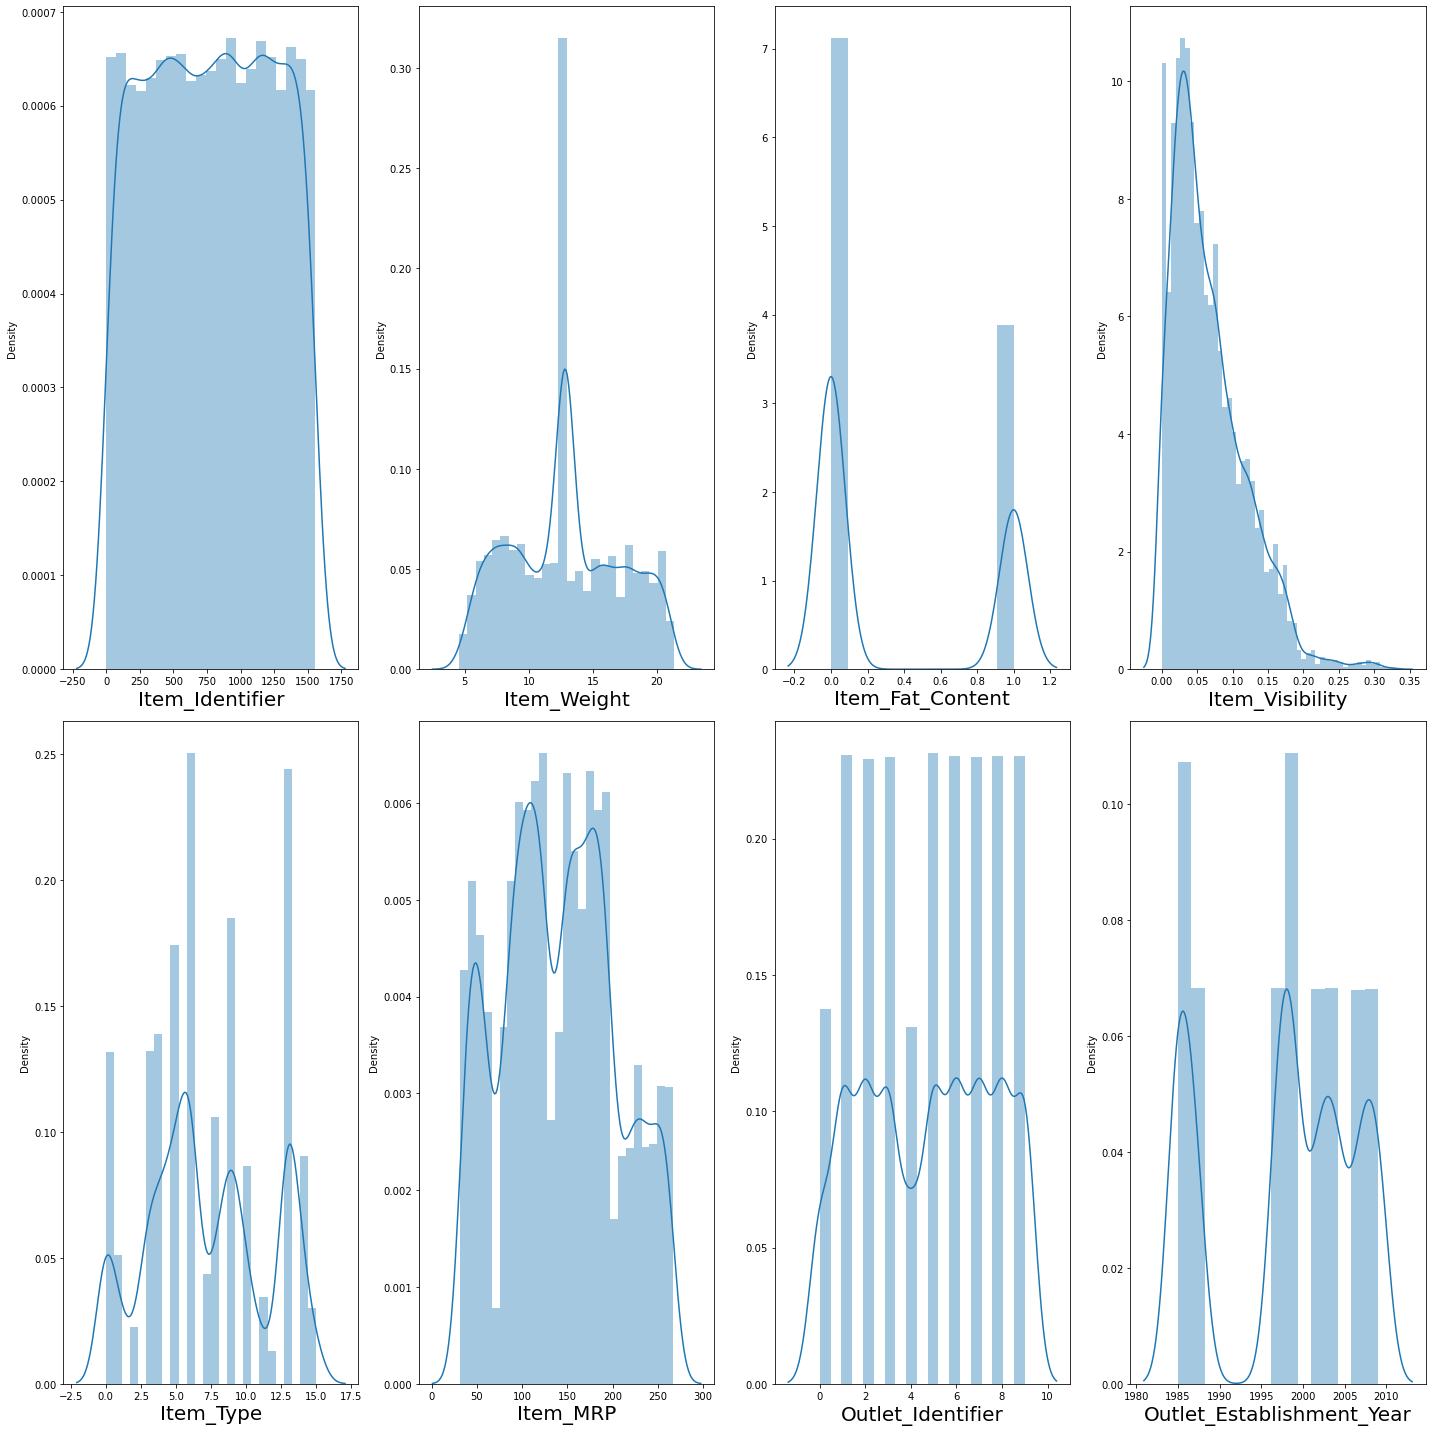

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in train:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() # plt.show()

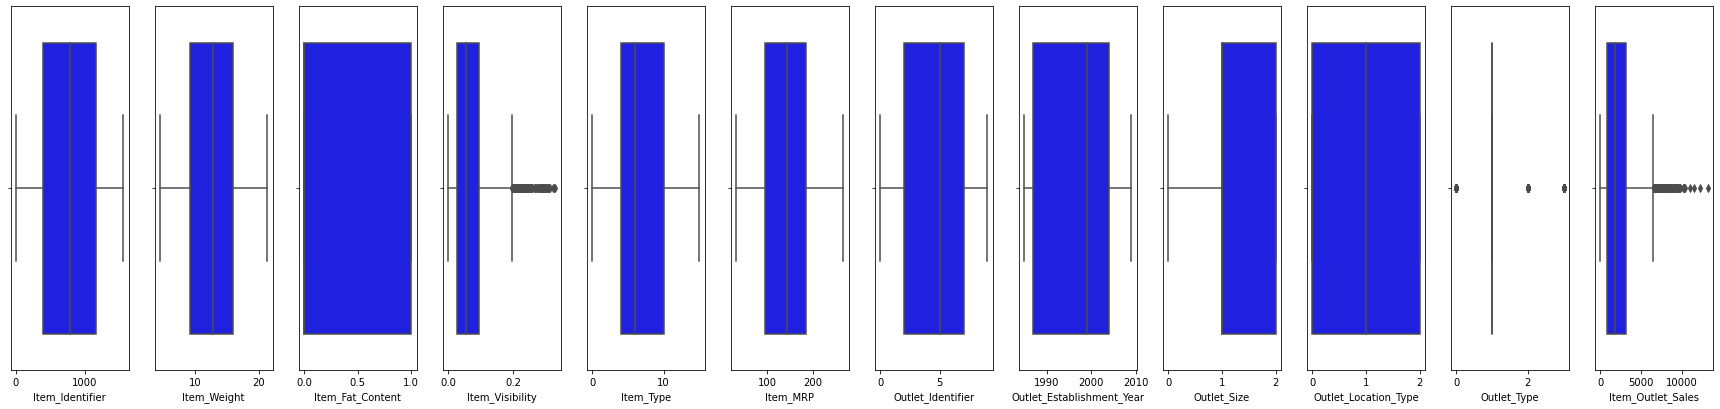

In [40]:
import matplotlib.pyplot as plt
collist=train.columns.values
ncol=30
nrows=16
plt.figure(figsize=(2*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(train[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [41]:
train.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [42]:
train=train.drop(columns='Item_Visibility',axis=1)

In [43]:
train=train.drop(columns='Item_Identifier',axis=1)

In [44]:
train.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

# Removing Outliers

In [45]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(train))
z.shape

(8523, 10)

In [46]:
thresold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 8522, 8522, 8522], dtype=int64), array([0, 1, 2, ..., 7, 8, 9], dtype=int64))


In [47]:
train_new=train[(z<3).all(axis=1)]
print(train.shape)
print(train_new.shape)

(8523, 10)
(8433, 10)


## % of Data Loss

In [48]:
loss_percent=(8523-8433)/8523*100
print(loss_percent)

1.0559662090813093


In [49]:
X=train_new.drop(columns='Item_Outlet_Sales',axis=1)
Y=train_new['Item_Outlet_Sales']

In [50]:
X

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,4,249.8092,9,1999,1,0,1
1,5.920,1,14,48.2692,3,2009,1,2,2
2,17.500,0,10,141.6180,9,1999,1,0,1
3,19.200,1,6,182.0950,0,1998,1,2,0
4,8.930,0,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,13,214.5218,1,1987,0,2,1
8519,8.380,1,0,108.1570,7,2002,1,1,1
8520,10.600,0,8,85.1224,6,2004,2,1,1
8521,7.210,1,13,103.1332,3,2009,1,2,2


In [51]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8433, dtype: float64

## Splitting data into train and test data

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [53]:
print(X.shape,X_train.shape,X_test.shape)

(8433, 9) (6746, 9) (1687, 9)


## Machine Learning Model Traing

In [54]:
from xgboost.sklearn import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
regressor=XGBRegressor()

In [55]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Evaluation

In [56]:
training_data_prediction=regressor.predict(X_train)

In [57]:
#R2 value
r2_train=metrics.r2_score(Y_train,training_data_prediction)

In [58]:
print('R2 value=',r2_train)

R2 value= 0.8365940932227592


In [59]:
test_data_prediction=regressor.predict(X_test)

In [60]:
#R2 value
r2_test=metrics.r2_score(Y_test,test_data_prediction)

In [61]:
print('R2 value for test data=',r2_test)

R2 value for test data= 0.5298797405927607


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x_scaled 

array([[-0.8387509 , -0.73809784, -0.76593975, ..., -0.28602194,
        -1.36275549, -0.24064615],
       [-1.63590819,  1.35483393,  1.60927902, ..., -0.28602194,
         1.09861034,  1.03168548],
       [ 1.09518099, -0.73809784,  0.65919151, ..., -0.28602194,
        -1.36275549, -0.24064615],
       ...,
       [-0.53215194, -0.73809784,  0.18414776, ...,  1.37515093,
        -0.13207258, -0.24064615],
       [-1.33166769,  1.35483393,  1.37175714, ..., -0.28602194,
         1.09861034,  1.03168548],
       [ 0.45839854, -0.73809784,  1.60927902, ...,  1.37515093,
        -1.36275549, -0.24064615]])

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25,random_state=23)
y_train.head()

8301    5806.4418
4737    1896.1984
1931    2332.9632
529     2503.4080
6354     307.5996
Name: Item_Outlet_Sales, dtype: float64

In [64]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [65]:
X.tail()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8518,6.865,0,13,214.5218,1,1987,0,2,1
8519,8.380,1,0,108.1570,7,2002,1,1,1
8520,10.600,0,8,85.1224,6,2004,2,1,1
8521,7.210,1,13,103.1332,3,2009,1,2,2
8522,14.800,0,14,75.4670,8,1997,2,0,1


In [66]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000,8433.000000
mean,12.856360,0.352662,7.224712,140.101789,4.719673,1997.915570,1.172181,1.107316,1.189138
std,4.240318,0.477827,4.210388,61.916404,2.846594,8.335299,0.602020,0.812605,0.786005
min,4.555000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,9.300000,0.000000,4.000000,93.377800,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,0.000000,6.000000,142.015400,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,16.100000,1.000000,10.000000,184.760800,7.000000,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [67]:
print('Sales is:',regression.predict(scaler.transform([[4.5,0.35,7,140,6,1985,1,1,1]])))

Sales is: [2045.45560671]


In [68]:
#adjusted R2 score
regression.score(x_train,y_train)

0.5000323527487159

In [69]:
regression.score(x_test,y_test)

0.5044722648467425

In [70]:
# plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([3255.190299  , 2800.13569592, 3092.2513213 , ..., 1176.67885533,
       1506.70482276, 1722.5357793 ])

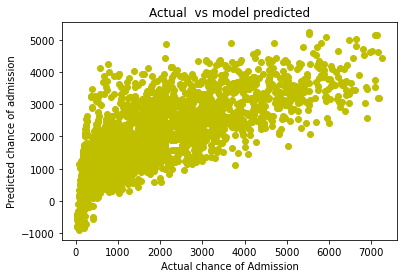

In [71]:
plt.scatter(y_test,y_pred,color='y')
plt.xlabel('Actual chance of Admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual  vs model predicted')
plt.show()

# cross validation

In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [73]:
y_pred=regression.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

1132.8960432063807

In [74]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [75]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [76]:
alpha=lasscv.alpha_
alpha

0.015756842088952824

In [77]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.015756842088952824)

In [78]:
lasso_reg.score(x_test,y_test)

0.5044737377874802

In [79]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [80]:
ridgecv.alpha_

0.001

In [81]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [82]:
ridge_model.score(x_test,y_test)

0.504472264765975

# Model Saving

In [83]:
import pickle
filename='advertise.pkl'
pickle.dump(regression,open(filename,'wb'))

## Conclusion

In [84]:
import numpy as np
a=np.array(y_test)
predicted=np.array(regression.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,2330.3000,3255.190299
1,1366.2216,2800.135696
2,2233.0932,3092.251321
3,3691.1952,2532.362055
4,3089.9778,3988.156448
...,...,...
2104,960.7494,1104.520020
2105,167.7816,1075.339891
2106,2006.7212,1176.678855
2107,3488.1262,1506.704823


# After Many Try i did't get best score....